In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to measurement table
measmt = Base.classes.measurement

In [9]:
# Save references to station table
statn = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [12]:
# Step 1: 
# Calculate the date 1 year ago from the last data point in the database

In [13]:
# Latest Date
session.query(measmt.date).order_by(measmt.date.desc()).first()

('2017-08-23')

In [14]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [15]:
# Step 2: 
# Perform a query to retrieve the data and precipitation scores
last12mnths_prcp_data = session.query(measmt.date, measmt.prcp).\
    filter(measmt.date >= query_date).\
    order_by(measmt.date).all()
        
last12mnths_prcp_data 

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
# Step 3: 
# Save the query results as a Pandas DataFrame and set the index to the date column
last12mnths_prcp_df = pd.DataFrame(last12mnths_prcp_data, columns=['Date', 'Precipitation'])
last12mnths_prcp_df.set_index('Date', inplace=True)


In [17]:
# Step 4: 
# Sort the dataframe by date
last12mnths_prcp_df.sort_values('Date')


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


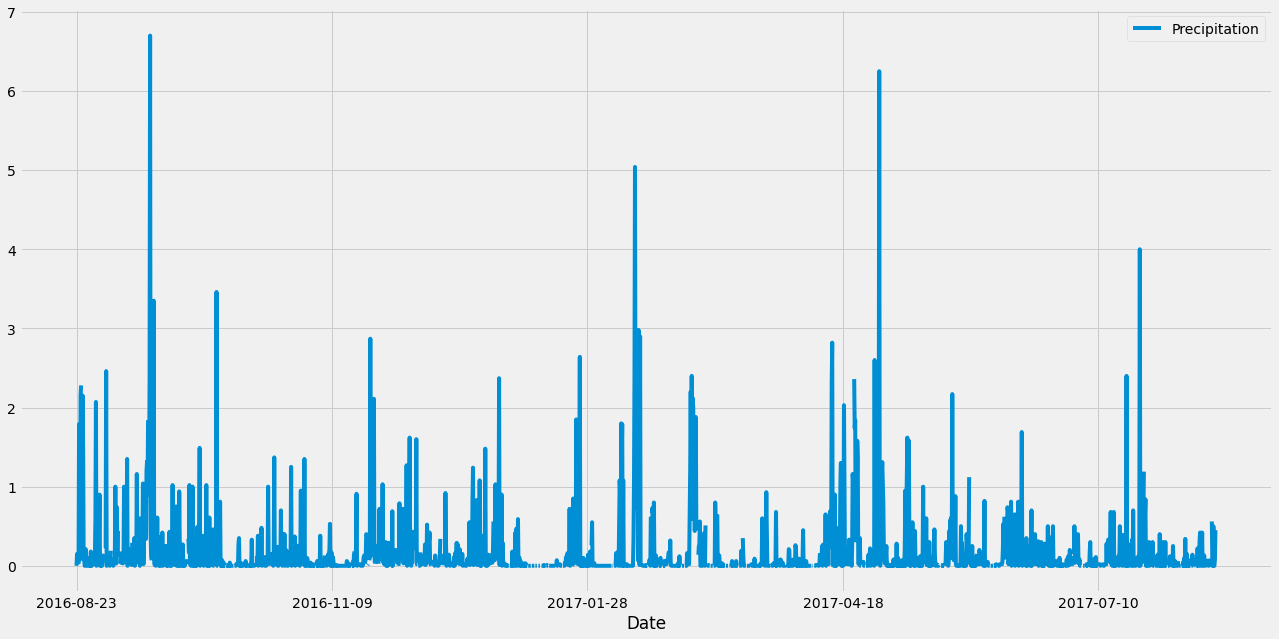

In [18]:
# Step 5: 
# Use Pandas Plotting with Matplotlib to plot the data
plt.title = ("Precipitation for last 12 months of data")
plt.xlabel = ("Date")
plt.ylabel = ("Inches")
plt.legend = ("Precipitation")
last12mnths_prcp_df.plot(figsize=(20,10))


In [19]:
# Step7: 
# Use Pandas to calcualte the summary statistics for the precipitation data
last12mnths_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Step 8: 
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(statn.station)).all()
print(f"There are: {station_count} stations in this dataset")   

There are: [(9,)] stations in this dataset


In [21]:
# Step 9:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(measmt.station, func.count(measmt.station)).\
group_by(measmt.station).\
order_by(func.count(measmt.tobs).desc()).all()

In [22]:
most_active_statn_df = pd.DataFrame(most_active_stations, columns=['Date', 'Precipitation'])
most_active_statn_df

,Date,Precipitation
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [23]:
# Step 10:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [24]:
most_active_statn_id = session.query(measmt.station).\
    group_by(measmt.station).\
    order_by(func.count(measmt.station).desc()).\
    limit(1).scalar()
most_active_statn_id

'USC00519281'

In [25]:
USC00519281_stats = session.query(measmt.station, measmt.tobs).\
    filter(measmt.station == 'USC00519281').\
    order_by(measmt.station).all()
#USC00519281_stats

In [26]:
USC00519281_df = pd.DataFrame(USC00519281_stats, columns=['Station ID', 'Temperature'])
temperatures = USC00519281_df['Temperature']

USC00519281_min = np.min(temperatures)
print(f"The lowest temperature recorded at USC00519281 is {USC00519281_min}")

USC00519281_max = np.max(temperatures)
print(f"The highest temperature recorded at USC00519281 is {USC00519281_max}")

USC00519281_avg = np.mean(temperatures)
print(f"The average temperature recorded at USC00519281 is {USC00519281_avg}")

The lowest temperature recorded at USC00519281 is 54.0
The highest temperature recorded at USC00519281 is 85.0
The average temperature recorded at USC00519281 is 71.66378066378067


In [27]:
# Step 11:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [28]:
most_active_statn_id = session.query(measmt.station).\
    group_by(measmt.station).\
    order_by(func.count(measmt.station).desc()).\
    limit(1).scalar()
most_active_statn_id

'USC00519281'

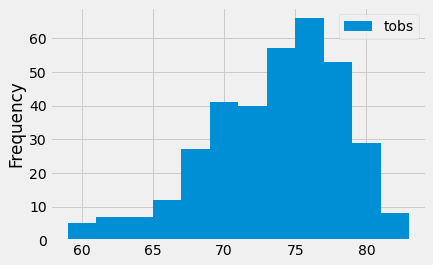

In [29]:
measurement_tobs = session.query(measmt.station, measmt.tobs).\
                filter(measmt.station == 'USC00519281').\
                filter(measmt.date >= query_date).statement

tobs_df = pd.read_sql(measurement_tobs, conn)
tobs_df.plot(kind='hist', bins=12)
plt.show()


# Climate App

In [ ]:
# Design a Flask API based on the queries that you have just developed.
# Flas dependancies

import numpy as np
import datetime as dt
import pandas as pd 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


In [ ]:
# Base Setup

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to measurement table
measmt = Base.classes.measurement

# Save references to station table
statn = Base.classes.station

In [ ]:
# Flask Setup
app = Flask(__name__)

In [ ]:
# / 
#Home page. 
#List all routes that are available.

@app.route("/")
def home():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )

In [ ]:
# /api/v1.0/precipitation
# Convert the query results to a dictionary using date as the key and prcp as the value.
# Return the JSON representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def precipitiation():
    
    session = Session(engine)
   
    measmt_results = session.query(measmt.date, measmt.prcp).all()

    session.close()
   
    prcp_data = []
    for date, prcp in measmt_results:
        prcp_dict = {}
        prcp_dict["date"] = date
        prcp_dict["prcp"] = prcp
        prcp_data.append(prcp_dict)

    return jsonify(prcp_data)

In [ ]:
# /api/v1.0/stations
# Return a JSON list of stations from the dataset.

@app.route("/api/v1.0/stations")
def stations():
    
    session = Session(engine)
    
    statn_results = session.query(measmt.station, measmt.tobs).all()

    session.close()
   
    tobs_data = []
    for station, tobs in statn_results:
        tobs_dict = {}
        tobs_dict["station"] = station
        tobs_dict["tobs"] = tobs
        tobs_data.append(tobs_dict)

    return jsonify(tobs_data)

In [ ]:
# /api/v1.0/tobs
# Query the dates and temperature observations of the most active station for the last year of data.
# Return a JSON list of temperature observations (TOBS) for the previous year.

@app.route("/api/v1.0/tobs")
def tobs():
    
    session = Session(engine)
      
    USC00519281_results = session.query(measmt.station, measmt.tobs).\
    filter(measmt.station == 'USC00519281').\
    order_by(measmt.station).all()

    session.close()

    USC00519281_list = []
    
    for date, tobs in USC00519281_results:
        USC00519281_dict = {}
        USC00519281_dict["date"] = date
        USC00519281_dict["tobs"] = tobs
        USC00519281_list.append(USC00519281_dict)

    return jsonify(USC00519281_list)

In [ ]:
# /api/v1.0/<start> 
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.

@app.route("/api/v1.0/<start>")
def tobs_start(start):

    
    session = Session(engine)

    end = session.query(measmt.date).order_by(measmt.date.desc()).first()
    start = dt.date(2017, 8, 23) - dt.timedelta(days=365)

    tobs_query = session.query(func.min(measmt.tobs), func.avg(measmt.tobs), func.max(measmt.tobs)).\
        filter(measmt.date >= start).all()

    session.close()

    tobs_list = []

    for min,avg,max in tobs_query:
        tobs_dict = {}
        tobs_dict["Min"] = min
        tobs_dict["Average"] = avg
        tobs_dict["Max"] = max
        tobs_list.append(tobs_dict)

    return jsonify(tobs_list)


In [ ]:
# /api/v1.0/<start>/<end>
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end
# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

@app.route("/api/v1.0/<start>/<end>")
def tobs_start_end(start):

    
    session = Session(engine)

    end = session.query(measmt.date).order_by(measmt.date.desc()).first()
    start = dt.date(2017, 8, 23) - dt.timedelta(days=365)

    tobs_query = session.query(func.min(measmt.tobs), func.avg(measmt.tobs), func.max(measmt.tobs)).\
        filter(measmt.date >= start).\
        filter(measmt.date <= end).all()

    session.close()

    tobs_list = []

    for min,avg,max in tobs_query:
        tobs_dict = {}
        tobs_dict["Min"] = min
        tobs_dict["Average"] = avg
        tobs_dict["Max"] = max
        tobs_list.append(tobs_dict)

    return jsonify(tobs_list)

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
